# KMeans Clustering



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('Customer.csv')
df.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [3]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
# X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet



array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

In [5]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
0,104.238636,39.806818,62.227273,48.511364
1,97.562500,38.098214,59.250000,51.526786


In [6]:
wcss = [] 
# ClusterNum = 5
# NumInit = 100
for i in range(1,11):
    k_means= KMeans(init="k-means++", n_init=50,n_clusters=i,random_state=40)
    k_means.fit(Clus_dataSet)
    wcss.append(k_means.inertia_)

# labels = k_means.labels_
# print(labels)

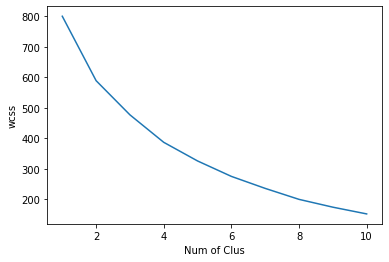

In [7]:
plt.plot(range(1,11),wcss)
plt.xlabel('Num of Clus')
plt.ylabel('wcss')
plt.show()

## The best & Optimum k=5 by Elbow Method

In [8]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[3 3 1 2 1 2 1 2 0 2 0 2 1 2 0 3 1 3 0 2 0 3 1 3 1 3 1 3 1 2 0 2 0 3 1 2 1
 2 1 2 1 3 0 2 1 2 1 2 2 2 1 3 2 0 1 0 1 0 2 0 0 3 1 1 0 3 1 1 3 2 0 1 1 1
 0 3 1 0 2 1 0 3 0 1 2 0 1 2 2 1 1 3 0 1 2 3 1 2 0 3 2 1 0 3 0 2 1 0 0 0 0
 2 1 3 2 2 1 1 1 1 3 1 2 3 2 2 0 3 0 3 4 3 2 2 4 2 1 3 4 2 1 3 2 2 4 3 0 2
 4 3 4 3 1 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 3 4 3 4 3 4 2 4 3 4 3 4 2 4 2 4
 3 4 3 4 2 4 2 4 2 4 2 4 3 4 3]


In [9]:
df["Clus_KMeans"] = labels
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_KMeans
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,1
3,4,1,23,16,77,2
4,5,1,31,17,40,1
5,6,1,22,17,76,2
6,7,1,35,18,6,1
7,8,1,23,18,94,2
8,9,0,64,19,3,0
9,10,1,30,19,72,2


In [10]:
y_kmeans = k_means.fit_predict(X)
y_kmeans

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

C:\Users\Saman\AppData\Local\Temp\ipykernel_13200\1099022513.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 2], s=X[:, 3] , c=labels.astype(np.float), alpha=0.5)


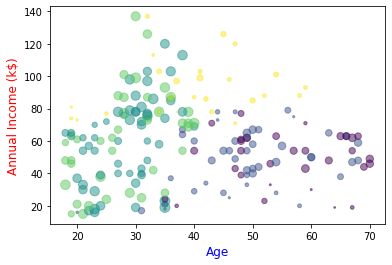

In [11]:
plt.scatter(X[:, 1], X[:, 2], s=X[:, 3] , c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=12 , c='blue')
plt.ylabel('Annual Income (k$)', fontsize=12 , c='red')

plt.show()

C:\Users\Saman\AppData\Local\Temp\ipykernel_13200\355483064.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\Saman\AppData\Local\Temp\ipykernel_13200\355483064.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float))


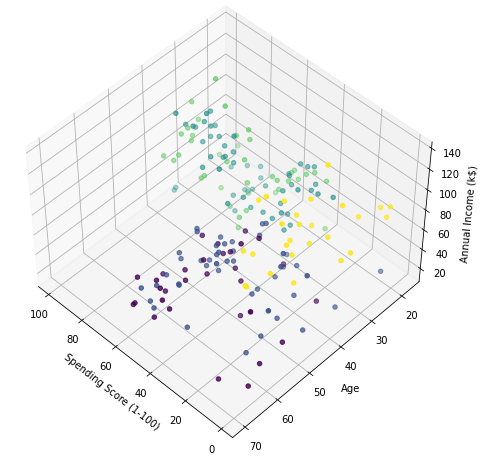

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')

ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float))

# Hierarcial Clustering


In [13]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
print(df.dtypes)
print(df.shape)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
(200, 5)


In [15]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df['Gender'] = df['Gender'].astype('int64')
# df["Gender"] = df['Gender'].astype('Int64')
print(df.dtypes)
df.head()

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [16]:
featureset = df[['Gender' , 'Age' ,'Annual Income (k$)' , 'Spending Score (1-100)']]
print(type(featureset))

<class 'pandas.core.frame.DataFrame'>


In [17]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
print(type(x))
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:10]

<class 'numpy.ndarray'>


array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ]])

In [18]:
#Compute the distance matrix
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [19]:
from scipy.cluster import hierarchy
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


C:\Users\Saman\AppData\Local\Temp\ipykernel_13200\1034595364.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


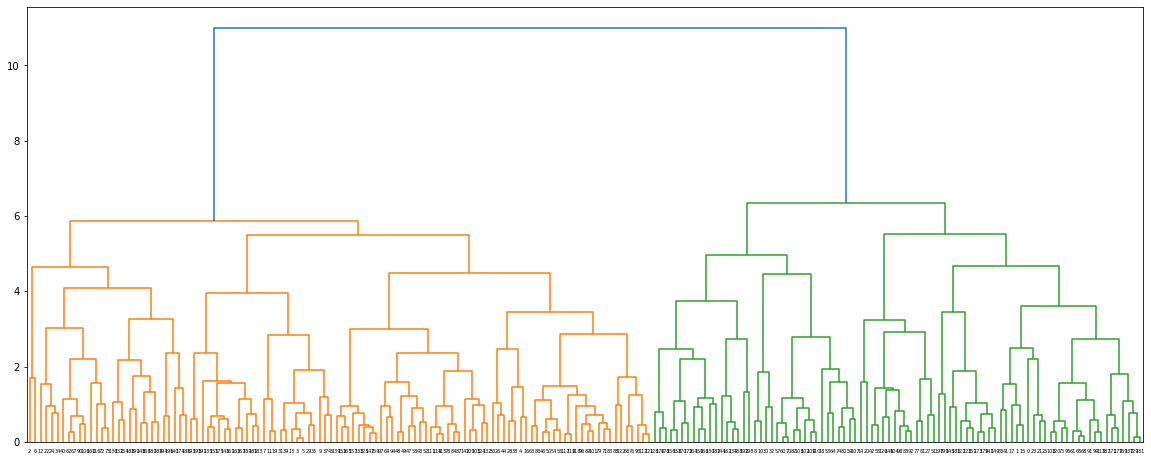

In [20]:
plt.figure(figsize=(20, 8))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], df['Spending Score (1-100)'][id] )
dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_rotation=0 )

In [21]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'average',affinity='euclidean')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\Saman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 2, 4, 1, 4, 1, 4, 3, 4, 3, 4, 1, 4, 3, 0, 1, 0, 3, 4, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 4, 3, 4, 3, 0, 1, 4, 1, 4, 1, 4, 1, 0, 3, 1,
       1, 4, 1, 1, 1, 1, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 1, 3, 1, 1, 1, 3, 0, 1, 0, 1, 1, 3, 0, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 0, 3, 1, 1, 0, 1, 1, 3, 0, 1, 1, 3, 0, 3, 1, 1, 3, 3, 3,
       3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 4, 3, 0, 3, 0, 3, 0,
       1, 4, 3, 4, 1, 0, 3, 4, 1, 0, 1, 4, 3, 0, 3, 4, 1, 0, 3, 0, 1, 4,
       1, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 1, 0, 3, 0, 3, 0, 1, 4,
       3, 0, 3, 0, 1, 4, 3, 4, 1, 0, 1, 0, 1, 4, 1, 4, 3, 4, 1, 4, 1, 0,
       3, 0], dtype=int64)

In [22]:
df['cluster_'] = agglom.labels_
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,2
3,4,1,23,16,77,4
4,5,1,31,17,40,1
5,6,1,22,17,76,4
6,7,1,35,18,6,1
7,8,1,23,18,94,4
8,9,0,64,19,3,3
9,10,1,30,19,72,4


In [23]:
customer_agg = df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()
customer_agg

C:\Users\Saman\AppData\Local\Temp\ipykernel_13200\1825890240.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_agg = df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
0,39.806818,62.227273,48.511364
1,38.098214,59.250000,51.526786


# DBSCAN

In [24]:
df = pd.read_csv('Customer.csv')
df.head(8)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [25]:
df['Gender'] = df['Gender'].map({'Male': 0 , "Female": 1})
df["Gender"] = df['Gender'].astype('int64')
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [26]:
from sklearn.preprocessing import StandardScaler
feature_selection = df[['Gender','Age','Annual Income (k$)' , 'Spending Score (1-100)']]
X = feature_selection.values #numpy
datasets = StandardScaler().fit_transform(X)
datasets

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

# Now I wanna reach the Optimiz of Eps , min_samples

In [27]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(datasets)
distances, indices = neighbors_fit.kneighbors(datasets)

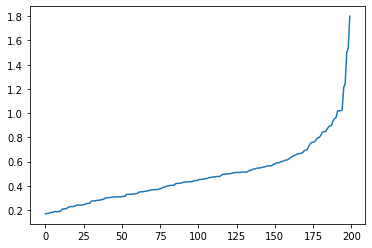

In [28]:
distances = np.sort(distances, axis=0)
#Annual Income
# distances = distances[:,1]
distances = distances[:,2]
# distances = distances[:,3]
plt.plot(distances)

In [29]:
from sklearn.cluster import DBSCAN
epsilon = 12
sample = 8
db = DBSCAN(eps=epsilon, min_samples=sample).fit(X)
labels = db.labels_
labels 


array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2, -1,  2,  1,  2, -1,  2,  3,  2, -1,  2, -1,  2,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3,
        2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [30]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 4
Estimated number of noise points: 61
